In [175]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import scipy.optimize as op

import random
import numpy as np

## Multi-class Classification

In [176]:
data = loadmat('data/ex3data1.mat')
x = data['X']
y = data['y']

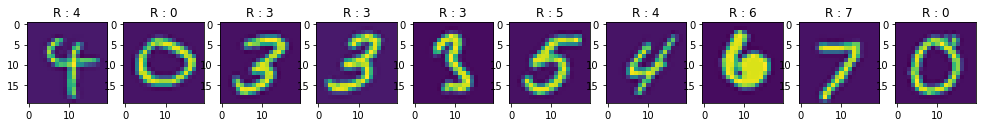

In [177]:
fig, axes = plt.subplots(1, 10, figsize=(17, 5))
for i, r in enumerate(random.sample(range(0, 5000), 10)):
    axes.flatten()[i].imshow(x[r].reshape(20, 20).T, interpolation='nearest')
    axes.flatten()[i].set_title('R : {}'.format(y.ravel()[r]%10))

In [178]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


def cost(theta, x, y):
    theta = theta.T.reshape(-1, 1)
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    # print(theta.shape, x.shape, y.shape, h.shape)
    j = (1/m) * (-y.T.dot(np.log(h)) - (1-y.T).dot(np.log(1-h)))
    return j
    

def grad(theta, x, y):
    theta = theta.T.reshape(-1, 1)
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    # print(theta.shape, x.shape, y.shape, h.shape)
    # g = (1/m) * (h-y).T.dot(x)
    g = (1/m) * x.T.dot(h-y)
    return g.ravel()


nx = np.c_[np.ones((x.shape[0], 1)), x]
theta = np.zeros(nx.shape[1])
c = cost(theta, nx, y)
g = grad(theta, nx, y)
print(c.shape)
print(g.shape)

(1, 1)
(401,)


In [179]:
def cost_reg(theta, lamda, x, y):
    theta = theta.T.reshape(-1, 1)
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    # print(theta.shape, x.shape, y.shape, h.shape)
    j = (1/m) * (-y.T.dot(np.log(h)) - (1-y.T).dot(np.log(1-h))) \
        + (lamda/(2*m))*np.sum(np.square(theta[1:]))
    return j
    

def grad_reg(theta, lamda, x, y):
    theta = theta.T.reshape(-1, 1)
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    g = (1/m) * (x.T.dot(h-y)) + (lamda/m)*theta
    return g.ravel()


nx = np.c_[np.ones((x.shape[0], 1)), x]
theta = np.zeros(nx.shape[1])
c = cost(theta, nx, y)
g = grad(theta, nx, y)
print(c.shape)
print(g.shape)

(1, 1)
(401,)


Prediction Accuracy 86.98%


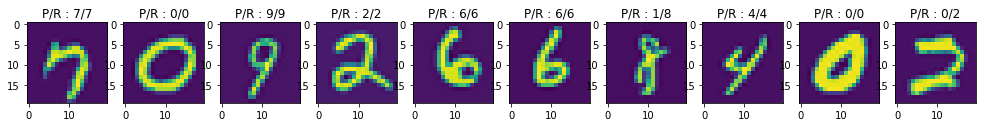

In [180]:
def one_vs_all(theta, x, y, k, lamda):
    all_theta = np.zeros((k, x.shape[1]))  # 10x401
    
    for c in np.arange(1, k+1):
        res = op.minimize(cost_reg, theta, args=(lamda, x, (y == c)*1), method=None, 
                          jac=grad_reg, options={'maxiter': 10}) # maxiter 500 하면 에러남.. 왜??
        all_theta[c-1] = res.x        
    return all_theta


def predict_one_vs_all(theta, x):
    res = sigmoid(x.dot(theta.T))
    return np.argmax(res, axis=1)+1


opt_theta = one_vs_all(theta, nx, y, 10, 10)
predict = predict_one_vs_all(opt_theta, nx)

print('Prediction Accuracy {}%'.format(np.mean(predict == y.ravel()) * 100))


fig, axes = plt.subplots(1, 10, figsize=(17, 5))
for i, r in enumerate(random.sample(range(0, 5000), 10)):
    axes.flatten()[i].imshow(x[r].reshape(20, 20).T, interpolation='nearest')
    axes.flatten()[i].set_title('P/R : {}/{}'.format(predict[r]%10, y.ravel()[r]%10))

## Neural Networks

In [181]:
data2 = loadmat('data/ex3weights.mat')
print(data2.keys())

theta1 = data2['Theta1']
theta2 = data2['Theta2']
print(nx.shape, y.shape, theta1.shape, theta2.shape)

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])
(5000, 401) (5000, 1) (25, 401) (10, 26)


Prediction Accuracy 97.52%


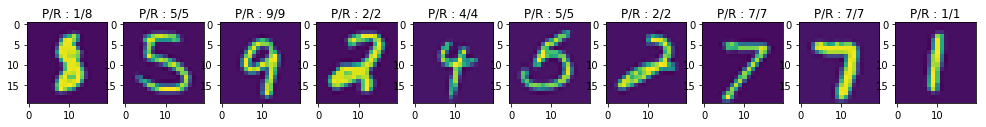

In [182]:
a2 = sigmoid(nx.dot(theta1.T))
na2 = np.c_[np.ones(a2.shape[0]), a2]
a3 = sigmoid(na2.dot(theta2.T))

predict_nn = np.argmax(a3, axis=1)+1

print('Prediction Accuracy {}%'.format(np.mean(predict_nn == y.ravel()) * 100))

fig, axes = plt.subplots(1, 10, figsize=(17, 5))
for i, r in enumerate(random.sample(range(0, 5000), 10)):
    axes.flatten()[i].imshow(x[r].reshape(20, 20).T, interpolation='nearest')
    axes.flatten()[i].set_title('P/R : {}/{}'.format(predict_nn[r]%10, y.ravel()[r]%10))